# Classificador centroid mais próximo
## Disciplina: CD.2021-1.M4.IRP
## Atividade: S01L05c - 16/10
## Aluno: Henrique Marques Turqueti


## Implementation from sklearn

In [90]:
from sklearn.neighbors import NearestCentroid
import numpy as np

X_train = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y_train = np.array([0, 0, 0, 1, 1, 1])

X_test = np.array([[-1, -2], [0, -1], [-3, -3], [2, 2],  [1, 2]])
y_test = np.array([0, 0, 0, 1, 1])

In [91]:
cn_model = NearestCentroid(metric='euclidean')
cn_model.fit(X_train, y_train)

cn_model.centroids_

array([[-2.        , -1.33333333],
       [ 2.        ,  1.33333333]])

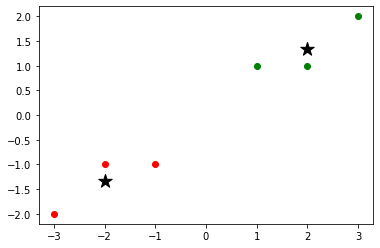

In [92]:
import matplotlib.pyplot as plt

plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='r')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='g')

plt.scatter(cn_model.centroids_[:,0], cn_model.centroids_[:,1], s=200, marker='*', c='k')

In [93]:
y_pred = cn_model.predict(X_test)
print(y_pred)
print(y_test)

[0 0 0 1 1]
[0 0 0 1 1]


In [94]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

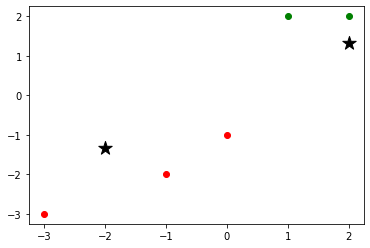

In [95]:
import matplotlib.pyplot as plt

plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='r')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='g')

plt.scatter(cn_model.centroids_[:,0], cn_model.centroids_[:,1], s=200, marker='*', c='k')

## Implementation from scratch

In [96]:
import numpy as np

In [97]:
class NearestCentroidScratch():
  def __init__(self, metric="euclidean"):
    self.metric = metric
    self.centroids = np.array([])

    #p values for Minkowski distance
    distance_metrics = {"manhattan":1, "euclidean":2}
    try:
      self.__p = distance_metrics[self.metric]
    except:
      raise ValueError(f"{self.metric} metric was not recognized.")
  
  def fit(self, X, y):
    self.__classes = np.asarray(np.unique(y))
    n_fit_classes = self.__classes.shape[0]
    if n_fit_classes < 2:
      raise ValueError(f"The number of classes has to be greater than one, got {n_fit_classes} class.")

    self.__n_fit_features = X.shape[1]
    self.centroids = np.empty(shape=(n_fit_classes, self.__n_fit_features), dtype=np.float64)
    for current_class in range(n_fit_classes):
      self.centroids[current_class,] = np.mean(X_train[y_train==self.__classes[current_class]], axis=0)

    return self.centroids

  def predict(self, X):
    self.predicted_classes = np.zeros(shape=X.shape[0], dtype=np.int32)
    self.__n_predict_features = X.shape[1]
    if self.__n_predict_features != self.__n_fit_features:
      raise ValueError(f"""The number of predict features must be equal to number of fit features, 
                           got {self.__n_fit_features} fit features and {self.__n_predict_features} predict features.""")
    for current_sample in range(X.shape[0]):
      distances = np.zeros(shape=self.centroids.shape[0], dtype=np.float64)
      for current_centroid in range(self.centroids.shape[0]):
        distances[current_centroid] = (np.sum((X[current_sample] - self.centroids[current_centroid])**self.__p))**(1/self.__p)
      self.predicted_classes[current_sample] = self.__classes[np.argmin(distances)]
    
    return self.predicted_classes

  def score(self, y_test, y_predict):
    if y_test.shape != y_predict.shape:
      raise TypeError("Both input arrays must have same shape.")
    match = y_test == y_predict
    accuracy = (match[True].shape[0]) / (y_test.shape[0])
    
    print(f"Accuracy: {100 * accuracy:.2f}%")
    return accuracy


In [98]:
X_train = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y_train = np.array([1, 1, 1, 2, 2, 2])

In [99]:
clf = NearestCentroidScratch()
clf.fit(X_train, y_train)

array([[-2.        , -1.33333333],
       [ 2.        ,  1.33333333]])

(-3.0, 3.0)

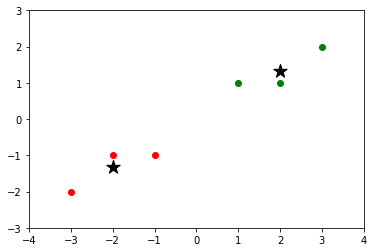

In [100]:
import matplotlib.pyplot as plt

plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r')
plt.scatter(X_train[y_train==2, 0], X_train[y_train==2, 1], c='g')

plt.scatter(clf.centroids[:,0], clf.centroids[:,1], s=200, marker='*', c='k')

plt.xlim([-4, 4])
plt.ylim([-3, 3])

In [101]:
X_test = np.array([[-1, -1]])
y_test = np.array([1])

y_predict = clf.predict(X_test)
print(y_predict)

[1]


(-3.0, 3.0)

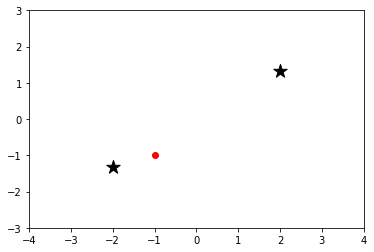

In [102]:
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='r')

plt.scatter(clf.centroids[:,0], clf.centroids[:,1], s=200, marker='*', c='k')

plt.xlim([-4, 4])
plt.ylim([-3, 3])

In [103]:
clf.score(y_test, y_predict)

Accuracy: 100.00%


1.0